In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [9]:
data = pd.read_csv('/content/House_price.csv')
print(data)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony      price  
0          2 BHK  Coomee        1056   2.0      1.0    $39.07   
1    

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [11]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [12]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [13]:

from sklearn import preprocessing
b=preprocessing.LabelEncoder()

data["area_type"]=b.fit_transform(data["area_type"])
print(data["area_type"])

data["availability"]=b.fit_transform(data["availability"])
print(data["availability"])

data["location"]=b.fit_transform(data["location"])
print(data["location"])

data["size"]=b.fit_transform(data["size"])
print(data["size"])

data["society"]=b.fit_transform(data["society"])
print(data["society"])

data["total_sqft"]=b.fit_transform(data["total_sqft"])
print(data["total_sqft"])

data["bath"]=b.fit_transform(data["bath"])
print(data["bath"])

data["balcony"]=b.fit_transform(data["balcony"])
print(data["balcony"])

data["price"]=b.fit_transform(data["price"])
print(data["price"])


0        3
1        2
2        0
3        3
4        3
        ..
13315    0
13316    3
13317    0
13318    3
13319    3
Name: area_type, Length: 13320, dtype: int64
0        40
1        80
2        80
3        80
4        80
         ..
13315    80
13316    80
13317    80
13318    32
13319    80
Name: availability, Length: 13320, dtype: int64
0         419
1         317
2        1179
3         757
4         716
         ... 
13315    1252
13316    1004
13317     972
13318     907
13319     396
Name: location, Length: 13320, dtype: int64
0        13
1        19
2        16
3        16
4        13
         ..
13315    22
13316    18
13317    13
13318    18
13319     0
Name: size, Length: 13320, dtype: int64
0         464
1        2439
2        2688
3        2186
4        2688
         ... 
13315     209
13316    2688
13317    1216
13318    2205
13319    2688
Name: society, Length: 13320, dtype: int64
0          70
1        1288
2         514
3         602
4         239
         ... 
133

In [14]:
X=data.iloc[:,:-1]
print(X)

       area_type  availability  location  size  society  total_sqft  bath  \
0              3            40       419    13      464          70     1   
1              2            80       317    19     2439        1288     4   
2              0            80      1179    16     2688         514     1   
3              3            80       757    16     2186         602     2   
4              3            80       716    13     2688         239     1   
...          ...           ...       ...   ...      ...         ...   ...   
13315          0            80      1252    22      209        1499     3   
13316          3            80      1004    18     2688        1535     4   
13317          0            80       972    13     1216         172     1   
13318          3            32       907    18     2205        1680     3   
13319          3            80       396     0     2688        1747     0   

       balcony  
0            1  
1            3  
2            3  
3      

In [15]:
Y=data["price"]
print(Y)

0          10
1           1
2          16
3          20
4          13
         ... 
13315     393
13316     917
13317    1506
13318    1190
13319     280
Name: price, Length: 13320, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)
print(X_train)

      area_type  availability  location  size  society  total_sqft  bath  \
399           3            80       304    16     2567         252     2   
5445          3            45       536    16     2155         612     2   
9197          3            80       536    13     1883          27     1   
4324          3            80       114    13     2688         239     1   
4415          0            80       713    16      991         849     1   
...         ...           ...       ...   ...      ...         ...   ...   
2176          0            80       626    13     2688        1909     1   
3826          3            34      1144    16     2688         303     2   
5467          3            80        96    16      728        1149     2   
5534          2            80       825    24     2688        1973     7   
8707          0            80       585    16     1749         884     3   

      balcony  
399         1  
5445        2  
9197        1  
4324        1  
4415   

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)
print(Y_test)

10500     741
10950     352
7180      173
6462      665
1280     1440
         ... 
11651     235
127       108
5348     2001
6152      956
13101    1006
Name: price, Length: 2664, dtype: int64


In [18]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.61600208  0.48262757 -0.46129741 ... -0.74271206 -0.42699066
   0.32711247]
 [ 0.61600208  0.48262757  1.30041256 ... -0.70456605 -0.42699066
  -0.73301847]
 [ 0.61600208 -2.33043826  0.60615614 ...  0.89915601  0.66584289
   1.38724341]
 ...
 [ 0.61600208  0.48262757 -0.46129741 ... -0.84284535 -0.42699066
   0.32711247]
 [ 0.61600208  0.48262757  1.5857986  ...  1.63028796 -0.97340744
  -0.73301847]
 [ 0.61600208  0.48262757 -1.12536876 ... -0.96999873 -0.42699066
  -0.73301847]]
[[-0.26120201 -1.35668471 -1.50405408 ... -0.83171943 -0.42699066
  -0.73301847]
 [ 0.61600208  0.48262757 -1.50405408 ...  1.74631543 -0.97340744
  -0.73301847]
 [ 0.61600208  0.48262757  1.30041256 ...  0.03928125  0.11942611
   0.32711247]
 ...
 [-0.26120201  0.48262757  1.61323956 ...  1.32988809 -0.42699066
  -0.73301847]
 [-2.01561019  0.48262757 -0.80979766 ... -1.20682191 -0.42699066
   0.32711247]
 [ 0.61600208  0.48262757 -0.04693883 ... -1.14960289 -0.42699066
   0.32711247]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, Y_train)

In [1]:
x=data.iloc[:,:-1]
print(x.columns)

NameError: name 'data' is not defined

In [2]:

y_pred = model.predict(X.iloc[[5]][['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)',
       'COURSE ID']].values)
print(y_pred)

NameError: name 'model' is not defined

In [ ]:
if(y_pred==1):
    print("Excelent")
elif(y_pred==2):
    print("very good")
elif(y_pred==3):
    print("good")
else:
    print("average")

X.iloc[[100]][['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)',
       'COURSE ID']]



       #y_pred=model.predict([[,0,0,0,0,0,0,0,0,0,0]])
#print(y_pred)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
predictions=logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print("Logistic Regression model Accuracy:",accuracy_score(Y_test,predictions))

Logistic Regression model Accuracy: 0.20689655172413793


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.29      0.27         7
           2       0.50      0.17      0.25         6
           3       0.50      0.10      0.17        10
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.50      0.67      0.57         3

    accuracy                           0.21        29
   macro avg       0.22      0.15      0.16        29
weighted avg       0.39      0.21      0.23        29



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,predictions))

Accuracy: 0.1724137931034483


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.22      0.29      0.25         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.60      1.00      0.75         3

    accuracy                           0.17        29
   macro avg       0.10      0.16      0.12        29
weighted avg       0.12      0.17      0.14        29



In [ ]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b=b.fit(X_train,Y_train)
predictions=b.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,predictions))

Accuracy: 0.1724137931034483


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.23      0.43      0.30         7
           2       0.00      0.00      0.00         6
           3       1.00      0.10      0.18        10
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.50      0.33      0.40         3

    accuracy                           0.17        29
   macro avg       0.22      0.11      0.11        29
weighted avg       0.45      0.17      0.18        29



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train,Y_train)
# Forecast the target variable for given test dataset
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,predictions))

Accuracy: 0.10344827586206896


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.17      1.00      0.29         3

    accuracy                           0.10        29
   macro avg       0.02      0.14      0.04        29
weighted avg       0.02      0.10      0.03        29



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 4],
       [2, 0, 0, 0, 0, 0, 4],
       [3, 0, 0, 0, 1, 1, 5],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 3]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.17      1.00      0.29         3

    accuracy                           0.10        29
   macro avg       0.02      0.14      0.04        29
weighted avg       0.02      0.10      0.03        29



In [ ]:
import sklearn as svm
b=svm.svm
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,predictions))

Accuracy: 0.10344827586206896


In [ ]:
from scipy.stats import entropy
p = [2,4,6,8] # probability distribution
ent = entropy(p, base=2)
print("Entropy:", ent)

Entropy: 1.8464393446710157


In [ ]:
import xgboost as xgb
b = xgb.Booster
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,predictions))

Accuracy: 0.10344827586206896


<function matplotlib.pyplot.show(close=None, block=None)>

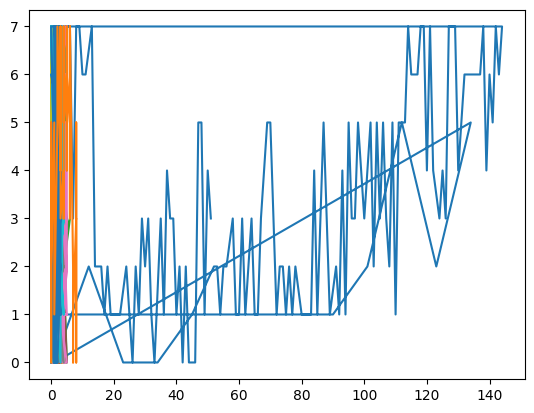

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.show

(array([[ 15.,  14.,  15.,  14.,  14.,  15.,  14.,  15.,  14.,  15.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [145.,   0.,

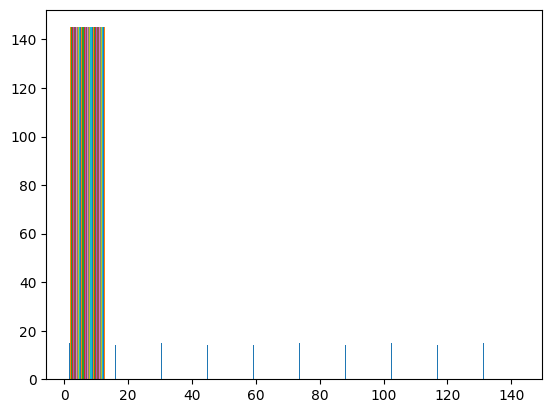

In [ ]:
plt.hist(X)

(array([ 8., 35., 24.,  0., 21., 10.,  0., 17., 13., 17.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

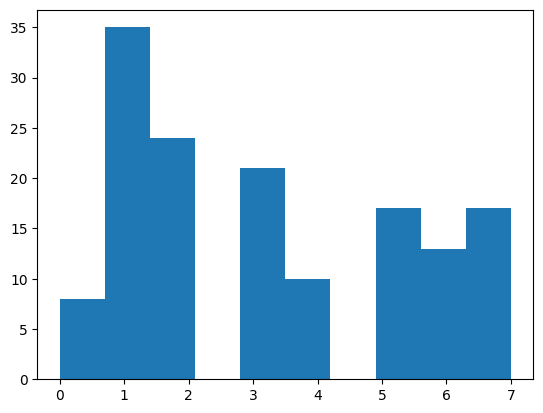

In [ ]:
plt.hist(Y)

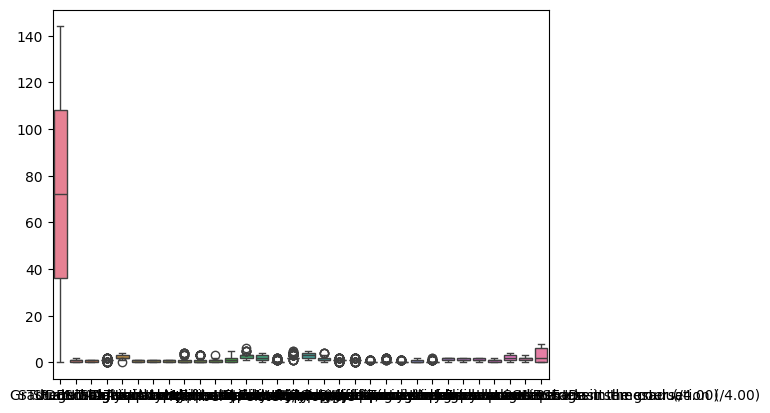

In [ ]:
sns.boxplot(X)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

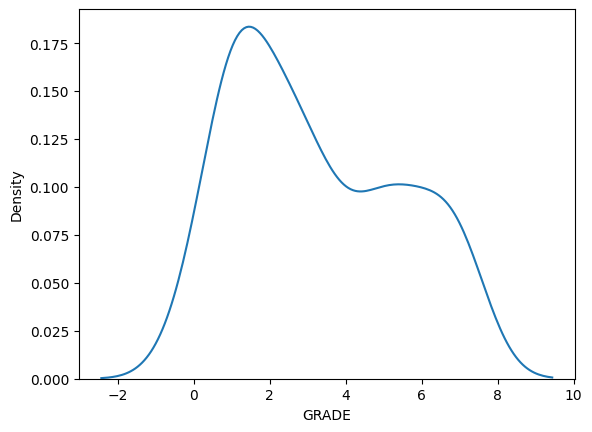

In [ ]:
sns.kdeplot(data.GRADE)
plt.show

<Axes: >

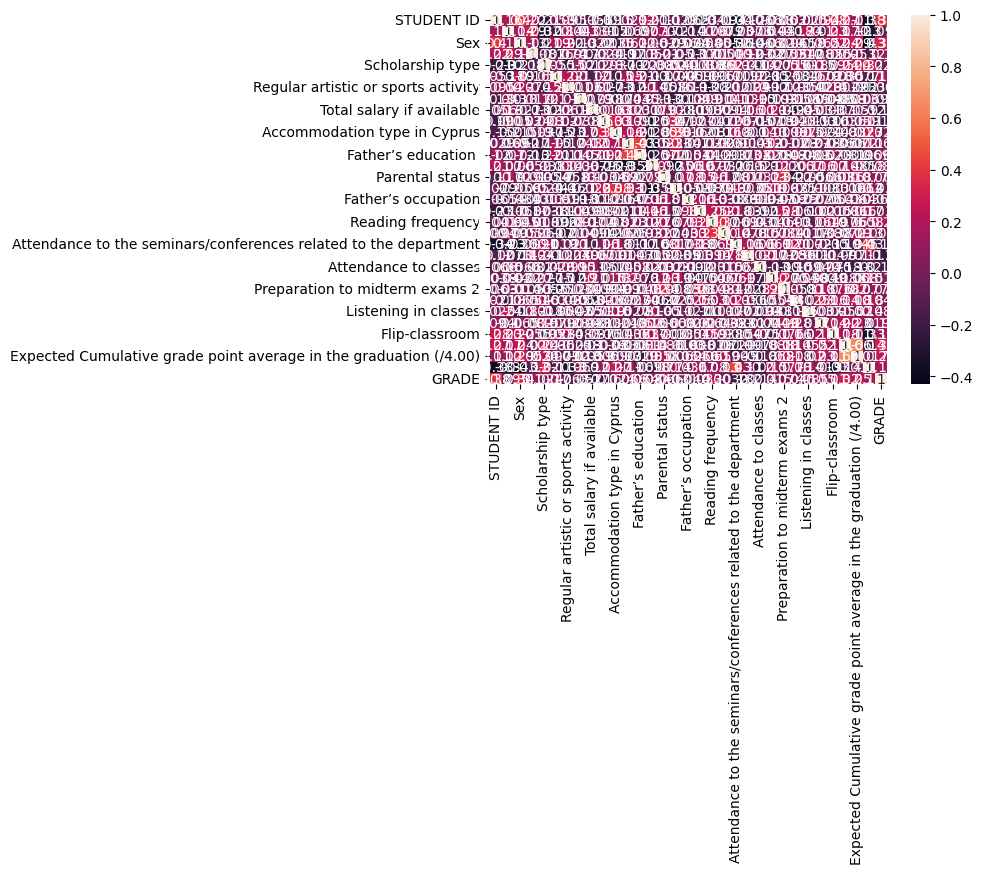

In [ ]:
cor_matrix=data.corr()
sns.heatmap(cor_matrix,annot=True)